1. Create a DB client (SQLAlchemy)
2. Read the data (geopandas)
3. Write the data to the db (geopandas + geoalchemy2)
   * `conda install --channel conda-forge geoalchemy2`
   * `conda uninstall geopandas` and then `

In [1]:
import json
from sqlalchemy import create_engine

In [3]:
with open("pg-credentials.json", "r") as f_in:
    pg_creds = json.load(f_in)

# load credentials from JSON file
HOST = pg_creds["HOST"]
USERNAME = pg_creds["USERNAME"]
PASSWORD = pg_creds["PASSWORD"]
DATABASE = pg_creds["DATABASE"]
PORT = pg_creds["PORT"]

engine = create_engine(f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}")

In [4]:
engine.execute('select 1').fetchone()

(1,)

In [5]:
import geopandas as gpd

In [7]:
import pandas as pd

df = pd.read_json("https://www3.septa.org/hackathon/Stops/index.php?req1=65")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat), crs="epsg:4326")

In [8]:
gdf

,lng,lat,stopid,stopname,geometry
0,-75.250644,39.989727,3826,63rd St &amp; City Line Av,POINT (-75.25064 39.98973)
1,-75.250680,39.989575,20569,63rd St &amp; City Line Av - FS,POINT (-75.25068 39.98958)
2,-75.249974,39.988467,20571,63rd St &amp; Overbrook Av,POINT (-75.24997 39.98847)
3,-75.249738,39.988306,3834,63rd St &amp; Overbrook Av,POINT (-75.24974 39.98831)
4,-75.249244,39.987431,20573,63rd St &amp; Sherwood Rd,POINT (-75.24924 39.98743)
...,...,...,...,...,...
124,-75.184384,40.034776,14071,Walnut Ln &amp; Wayne Av,POINT (-75.18438 40.03478)
125,-75.184573,40.034803,20552,Walnut Ln &amp; Wayne Av - FS,POINT (-75.18457 40.03480)
126,-75.189558,40.032528,14072,Walnut Ln &amp; Wissahickon Av - FS,POINT (-75.18956 40.03253)
127,-75.182790,40.034059,16448,Wayne Av &amp; Harvey St,POINT (-75.18279 40.03406)


In [11]:
from matplotlib import pyplot as plt

%matplotlib inline

In [15]:
philly=gpd.read_file("http://data.phl.opendata.arcgis.com/datasets/405ec3da942d4e20869d4e1449a2be48_0.geojson")

In [72]:
septa=gpd.read_file("https://opendata.arcgis.com/datasets/e09e9f98bdf04eada214d2217f3adbf1_0.geojson")

In [74]:
stops= septa.drop_duplicates(subset=['Stop_Name','Mode'])

In [75]:
stops['Mode'].unique()

array(['Bus', 'Trolley', 'Highspeed'], dtype=object)

In [64]:
stops.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
stops_philly=stops[stops.within(philly.geometry[0])]

In [68]:
len(stops_philly)

6419

In [62]:
stops.head()

,OBJECTID,GIS_DB_ID,Sign_Up,Route,Direction,Sequence,Stop_ID,Stop_Abbreviation,Stop_Name,Mode,...,Weekday_Boards,Weekday_Leaves,Saturday_Boards,Saturday_Leaves,Sunday_Boards,Sunday_Leaves,Latitude,Longitude,GlobalID,geometry
0,1,6722579N,City,67,Northbound,134,22579,KNIPATNE,Knights Rd & Patrician Dr,Bus,...,1.0,9.0,0.0,1.0,0.0,1.0,40.081350,-74.976152,07f518b8-0f98-4724-a565-c1263d9fa051,POINT (-74.97615 40.08135)
1,2,12728080W,Frontier,127,Westbound,38,28080,LEVPENNO,Levittown Pkwy & Penn Ln,Bus,...,0.0,0.0,1.0,0.0,NaN,NaN,40.154454,-74.827669,c9bf2355-e066-43af-bd72-fdc6ba373ea1,POINT (-74.82767 40.15445)
2,3,89220W,City,89,Westbound,1,220,ARRTRAWE,Arrott Transportation Center,Bus,...,197.0,2.0,47.0,0.0,50.0,0.0,40.016869,-75.084202,b12b9a79-c942-4e78-8b27-508e4da6d71a,POINT (-75.08420 40.01687)
3,4,3131044E,City,31,Eastbound,24,31044,MAR61SEA,Market St & 61st St - FS,Bus,...,11.0,20.0,3.0,8.0,2.0,6.0,39.962057,-75.242564,6f5aa081-1c66-4a7f-a47b-36c9f280feea,POINT (-75.24256 39.96206)
4,5,11730011S,Victory,117,Southbound,98,30011,BETTOWEA,Bethal Rd & Townsend St - FS,Bus,...,0.0,9.0,0.0,2.0,0.0,1.0,39.844850,-75.394648,36d6f288-b715-4d6f-af6b-01c5b8e981fd,POINT (-75.39465 39.84485)


<AxesSubplot:>

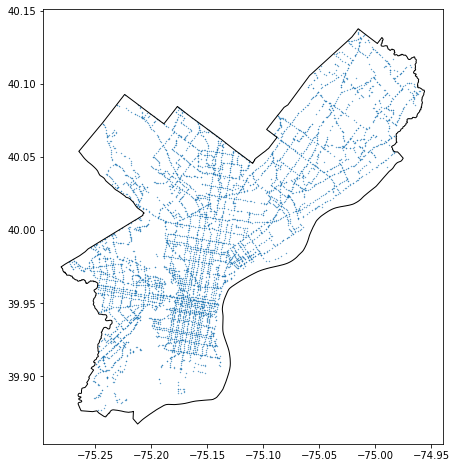

In [69]:
fig,ax=plt.subplots(figsize=(10,8))

stops_philly.plot(ax=ax,markersize=0.1)
philly.plot(ax=ax,facecolor="none",edgecolor="black")

In [65]:
stops.to_postgis('stops_uniq', con=engine)

In [71]:
stops_philly.to_postgis('stops_philly',con=engine)